# Breast Cancer Data Set 

## About Data Set 
Health is an essential aspect of everyone’s life. Breast cancer is found in the body of male or female when the cells in the breast begin to grow out of control. These cells usually form a tumor and can be felt as a lump or could be seen on an x-ray. Cancer can be distinguished as benign, or either can be malignant (cancer).

In [1]:
# Firstly import neccessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
warnings.simplefilter("ignore")
# To look better

In [3]:
df = pd.read_csv("data.csv") 
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,21.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


This is a function have been written to get first info of data set. However,this function can use every data analysis or
ML project.

In [4]:
def get_first_info(df): 
    print(df.info()) 
    print("----------------------------------------------------------------------------------------------") 
    print(df.describe().T)

In [5]:
get_first_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop("id",axis=1,inplace=True)
# I droppped the id because it is not useful a variable and it will not determine as cardinal cols

In [7]:
def grab_col_names(dataframe,cat_upper_limit=10 ,cardinal_lower_limit = 20): 
    """ 
    This function helps to determine types of columns. Numerical,Categorical,Cardinal 
    Parameters: dataframe = DataFrame 
    cat_upper_limit = upper limit of categorical columns's number of unique ->values 10 inital value
    cardinal_lowe_limit = lower limit to classify a column as cardinal -> 20 initial value
    Return: 
    cat_cols: includes categorical names but also includes encoding columns or has less unique value than cat_lower_limit
    num_cols: includes  names of numerical columns 
    cardinal_cols : includes names of cardinal columns.In other words,columns which does not carry information. 
    """  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_upper_limit and 
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_lower_limit and 
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
 
    return cat_cols,num_cols,cat_but_car

In [8]:
cat_cols,num_cols,cardinal_cols = grab_col_names(df)

In [9]:
def printColsTypes(num_cols,cat_cols,cardinal_cols):
    print(cat_cols,"\n", num_cols,"\n",cardinal_cols)

In [12]:
printColsTypes(num_cols,cat_cols,cardinal_cols)

['diagnosis'] 
 ['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 
 []


Cols have been seperated correctly. diagnosis is my output(y),its type is object we have classification problem.

In [13]:
def summarize_Data_Plot(df,cat_cols,num_cols): 
    for col_name in cat_cols :   
        print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
        sns.countplot(x=df[col_name],data=df)
        plt.show()  
        print("-------------------------------------------------------------------------------") 
    for col_name in num_cols:  
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(col_name)
        print(df[col_name].describe(quantiles).T)
        df[col_name].hist() 
        plt.title(col_name) 
        plt.show()
        print("-------------------------------------------------------------------------------") 

   diagnosis  Ratio
B        357 62.742
M        212 37.258


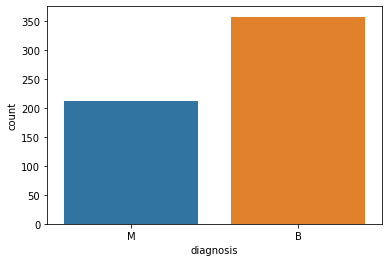

-------------------------------------------------------------------------------
Radius_mean
count   569.000
mean     14.127
std       3.524
min       6.981
5%        9.529
10%      10.260
20%      11.366
30%      12.012
40%      12.726
50%      13.370
60%      14.058
70%      15.056
80%      17.068
90%      19.530
95%      20.576
99%      24.372
max      28.110
Name: Radius_mean, dtype: float64


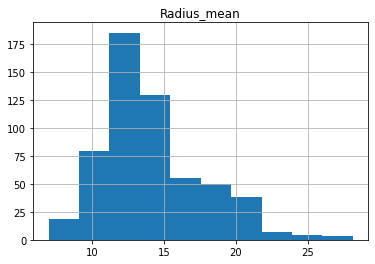

-------------------------------------------------------------------------------
Texture_mean
count   569.000
mean     19.297
std       4.302
min       9.710
5%       13.088
10%      14.078
20%      15.656
30%      16.840
40%      17.922
50%      18.870
60%      19.978
70%      21.298
80%      22.440
90%      24.992
95%      27.150
99%      30.652
max      39.280
Name: Texture_mean, dtype: float64


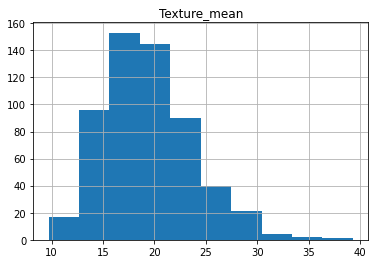

-------------------------------------------------------------------------------
perimeter_mean
count   569.000
mean     91.969
std      24.299
min      43.790
5%       60.496
10%      65.830
20%      73.292
30%      77.360
40%      81.938
50%      86.240
60%      91.420
70%      98.200
80%     111.680
90%     129.100
95%     135.820
99%     165.724
max     188.500
Name: perimeter_mean, dtype: float64


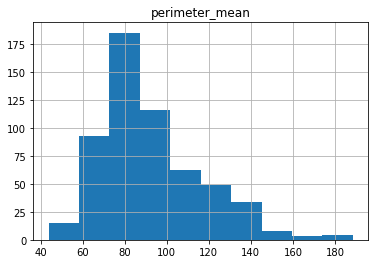

-------------------------------------------------------------------------------
area_mean
count    569.000
mean     654.889
std      351.914
min      143.500
5%       275.780
10%      321.600
20%      396.560
30%      444.060
40%      496.440
50%      551.100
60%      609.740
70%      700.660
80%      915.060
90%     1177.400
95%     1309.800
99%     1786.600
max     2501.000
Name: area_mean, dtype: float64


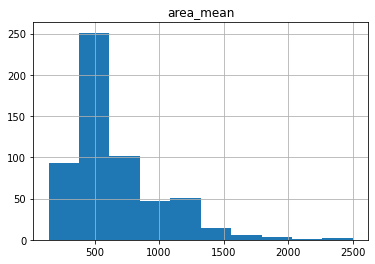

-------------------------------------------------------------------------------
smoothness_mean
count   569.000
mean      0.096
std       0.014
min       0.053
5%        0.075
10%       0.080
20%       0.084
30%       0.088
40%       0.092
50%       0.096
60%       0.099
70%       0.103
80%       0.107
90%       0.115
95%       0.119
99%       0.133
max       0.163
Name: smoothness_mean, dtype: float64


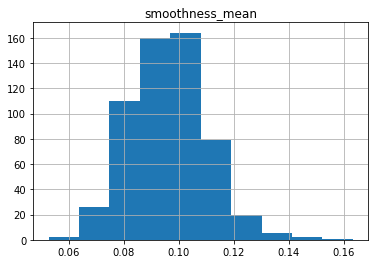

-------------------------------------------------------------------------------
compactness_mean
count   569.000
mean      0.104
std       0.053
min       0.019
5%        0.041
10%       0.050
20%       0.060
30%       0.070
40%       0.080
50%       0.093
60%       0.109
70%       0.122
80%       0.142
90%       0.175
95%       0.209
99%       0.277
max       0.345
Name: compactness_mean, dtype: float64


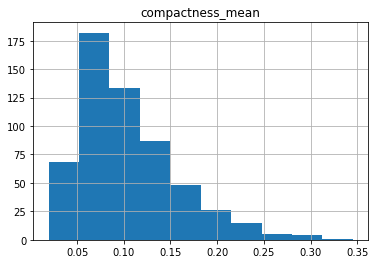

-------------------------------------------------------------------------------
concavity_mean
count   569.000
mean      0.089
std       0.080
min       0.000
5%        0.005
10%       0.014
20%       0.025
30%       0.034
40%       0.045
50%       0.062
60%       0.086
70%       0.112
80%       0.150
90%       0.203
95%       0.243
99%       0.352
max       0.427
Name: concavity_mean, dtype: float64


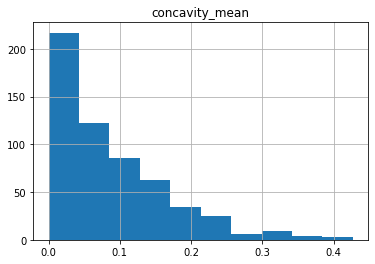

-------------------------------------------------------------------------------
concave points_mean
count   569.000
mean      0.049
std       0.039
min       0.000
5%        0.006
10%       0.011
20%       0.018
30%       0.023
40%       0.028
50%       0.034
60%       0.048
70%       0.064
80%       0.084
90%       0.100
95%       0.126
99%       0.164
max       0.201
Name: concave points_mean, dtype: float64


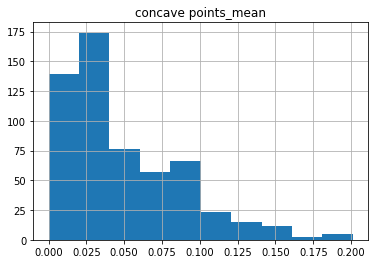

-------------------------------------------------------------------------------
symmetry_mean
count   569.000
mean      0.181
std       0.027
min       0.106
5%        0.142
10%       0.150
20%       0.159
30%       0.165
40%       0.172
50%       0.179
60%       0.185
70%       0.193
80%       0.201
90%       0.215
95%       0.231
99%       0.260
max       0.304
Name: symmetry_mean, dtype: float64


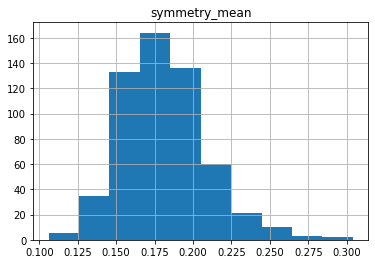

-------------------------------------------------------------------------------
fractal_dimension_mean
count   569.000
mean      0.063
std       0.007
min       0.050
5%        0.054
10%       0.055
20%       0.057
30%       0.059
40%       0.060
50%       0.062
60%       0.063
70%       0.065
80%       0.068
90%       0.072
95%       0.076
99%       0.085
max       0.097
Name: fractal_dimension_mean, dtype: float64


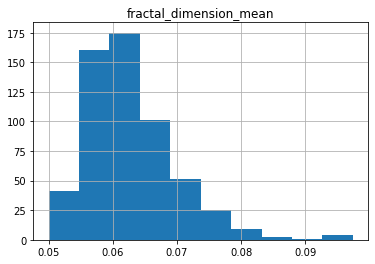

-------------------------------------------------------------------------------
radius_se
count   569.000
mean      0.405
std       0.277
min       0.112
5%        0.160
10%       0.183
20%       0.219
30%       0.246
40%       0.280
50%       0.324
60%       0.369
70%       0.431
80%       0.546
90%       0.749
95%       0.960
99%       1.291
max       2.873
Name: radius_se, dtype: float64


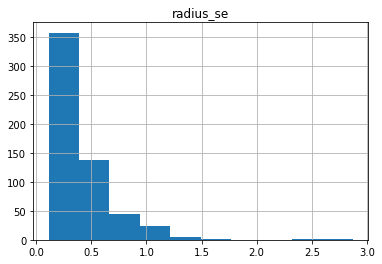

-------------------------------------------------------------------------------
texture_se
count   569.000
mean      1.217
std       0.552
min       0.360
5%        0.540
10%       0.640
20%       0.781
30%       0.902
40%       1.005
50%       1.108
60%       1.239
70%       1.388
80%       1.561
90%       1.909
95%       2.212
99%       2.915
max       4.885
Name: texture_se, dtype: float64


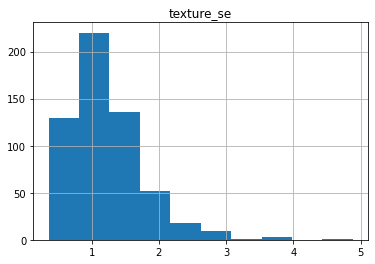

-------------------------------------------------------------------------------
perimeter_se
count   569.000
mean      2.866
std       2.022
min       0.757
5%        1.133
10%       1.280
20%       1.517
30%       1.741
40%       2.039
50%       2.287
60%       2.591
70%       3.050
80%       3.768
90%       5.123
95%       7.042
99%       9.690
max      21.980
Name: perimeter_se, dtype: float64


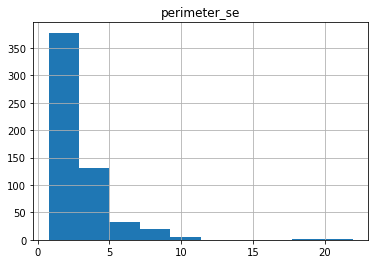

-------------------------------------------------------------------------------
area_se
count   569.000
mean     40.337
std      45.491
min       6.802
5%       11.360
10%      13.160
20%      16.640
30%      19.038
40%      21.078
50%      24.530
60%      29.322
70%      38.430
80%      54.088
90%      91.314
95%     115.800
99%     177.684
max     542.200
Name: area_se, dtype: float64


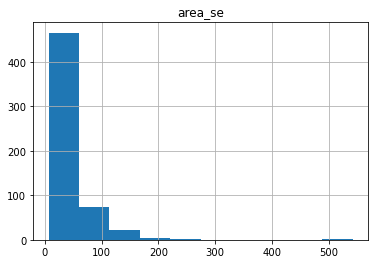

-------------------------------------------------------------------------------
smoothness_se
count   569.000
mean      0.007
std       0.003
min       0.002
5%        0.004
10%       0.004
20%       0.005
30%       0.005
40%       0.006
50%       0.006
60%       0.007
70%       0.008
80%       0.009
90%       0.010
95%       0.013
99%       0.017
max       0.031
Name: smoothness_se, dtype: float64


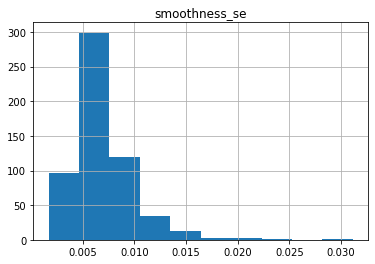

-------------------------------------------------------------------------------
compactness_se
count   569.000
mean      0.025
std       0.018
min       0.002
5%        0.008
10%       0.009
20%       0.012
30%       0.014
40%       0.017
50%       0.020
60%       0.024
70%       0.030
80%       0.036
90%       0.048
95%       0.061
99%       0.090
max       0.135
Name: compactness_se, dtype: float64


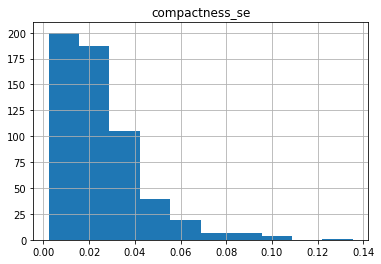

-------------------------------------------------------------------------------
concavity_se
count   569.000
mean      0.032
std       0.030
min       0.000
5%        0.003
10%       0.008
20%       0.013
30%       0.017
40%       0.020
50%       0.026
60%       0.031
70%       0.037
80%       0.046
90%       0.059
95%       0.079
99%       0.122
max       0.396
Name: concavity_se, dtype: float64


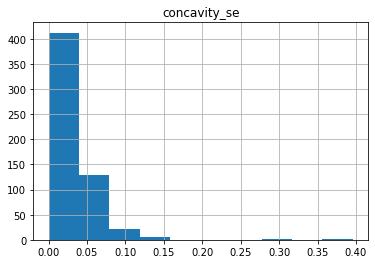

-------------------------------------------------------------------------------
concave points_se
count   569.000
mean      0.012
std       0.006
min       0.000
5%        0.004
10%       0.005
20%       0.007
30%       0.008
40%       0.010
50%       0.011
60%       0.012
70%       0.014
80%       0.016
90%       0.019
95%       0.023
99%       0.031
max       0.053
Name: concave points_se, dtype: float64


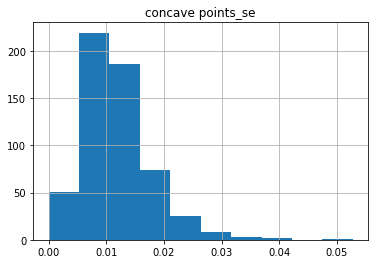

-------------------------------------------------------------------------------
symmetry_se
count   569.000
mean      0.021
std       0.008
min       0.008
5%        0.012
10%       0.013
20%       0.015
30%       0.016
40%       0.017
50%       0.019
60%       0.020
70%       0.022
80%       0.026
90%       0.030
95%       0.035
99%       0.052
max       0.079
Name: symmetry_se, dtype: float64


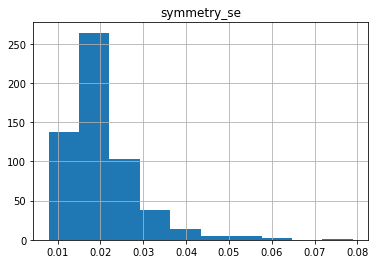

-------------------------------------------------------------------------------
fractal_dimension_se
count   569.000
mean      0.004
std       0.003
min       0.001
5%        0.002
10%       0.002
20%       0.002
30%       0.002
40%       0.003
50%       0.003
60%       0.004
70%       0.004
80%       0.005
90%       0.006
95%       0.008
99%       0.013
max       0.030
Name: fractal_dimension_se, dtype: float64


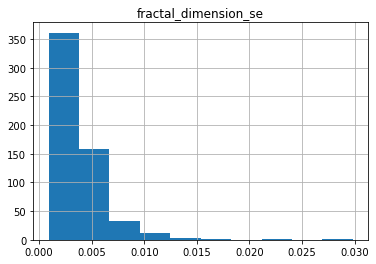

-------------------------------------------------------------------------------
radius_worst
count   569.000
mean     16.269
std       4.833
min       7.930
5%       10.534
10%      11.234
20%      12.498
30%      13.314
40%      14.008
50%      14.970
60%      16.004
70%      17.386
80%      20.294
90%      23.682
95%      25.640
99%      30.763
max      36.040
Name: radius_worst, dtype: float64


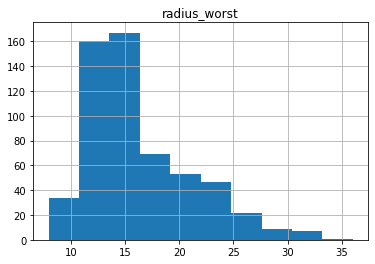

-------------------------------------------------------------------------------
texture_worst
count   569.000
mean     25.677
std       6.146
min      12.020
5%       16.574
10%      17.800
20%      20.176
30%      21.988
40%      23.584
50%      25.410
60%      26.724
70%      28.460
80%      30.908
90%      33.646
95%      36.300
99%      41.802
max      49.540
Name: texture_worst, dtype: float64


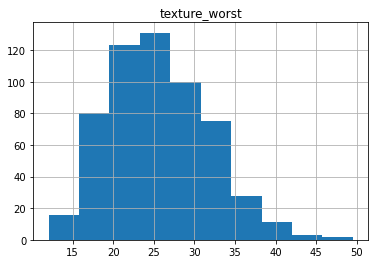

-------------------------------------------------------------------------------
perimeter_worst
count   569.000
mean    107.261
std      33.603
min      50.410
5%       67.856
10%      72.178
20%      81.402
30%      86.328
40%      91.304
50%      97.660
60%     105.740
70%     115.900
80%     133.500
90%     157.740
95%     171.640
99%     208.304
max     251.200
Name: perimeter_worst, dtype: float64


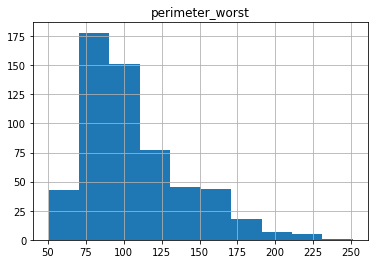

-------------------------------------------------------------------------------
area_worst
count    569.000
mean     880.583
std      569.357
min      185.200
5%       331.060
10%      384.720
20%      475.980
30%      544.140
40%      599.700
50%      686.500
60%      781.180
70%      926.960
80%     1269.000
90%     1673.000
95%     2009.600
99%     2918.160
max     4254.000
Name: area_worst, dtype: float64


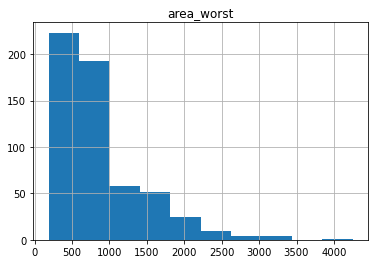

-------------------------------------------------------------------------------
smoothness_worst
count   569.000
mean      0.132
std       0.023
min       0.071
5%        0.096
10%       0.103
20%       0.113
30%       0.121
40%       0.126
50%       0.131
60%       0.138
70%       0.143
80%       0.150
90%       0.161
95%       0.172
99%       0.189
max       0.223
Name: smoothness_worst, dtype: float64


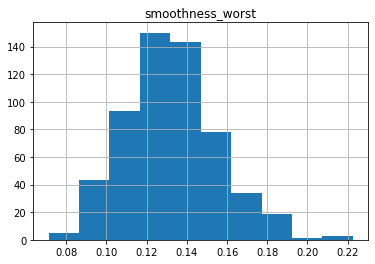

-------------------------------------------------------------------------------
compactness_worst
count   569.000
mean      0.254
std       0.157
min       0.027
5%        0.071
10%       0.094
20%       0.126
30%       0.161
40%       0.185
50%       0.212
60%       0.251
70%       0.304
80%       0.367
90%       0.448
95%       0.564
99%       0.779
max       1.058
Name: compactness_worst, dtype: float64


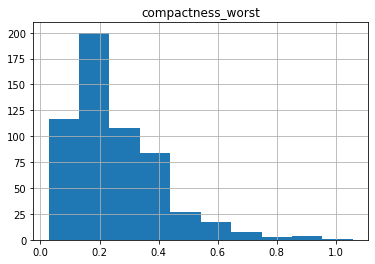

-------------------------------------------------------------------------------
concavity_worst
count   569.000
mean      0.272
std       0.209
min       0.000
5%        0.018
10%       0.046
20%       0.092
30%       0.137
40%       0.177
50%       0.227
60%       0.287
70%       0.350
80%       0.420
90%       0.571
95%       0.682
99%       0.902
max       1.252
Name: concavity_worst, dtype: float64


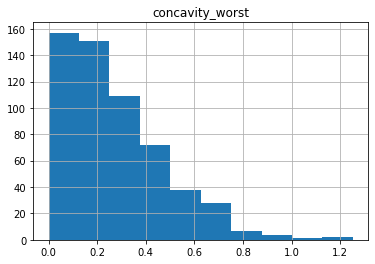

-------------------------------------------------------------------------------
concave points_worst
count   569.000
mean      0.115
std       0.066
min       0.000
5%        0.024
10%       0.038
20%       0.058
30%       0.072
40%       0.084
50%       0.100
60%       0.122
70%       0.151
80%       0.178
90%       0.209
95%       0.237
99%       0.269
max       0.291
Name: concave points_worst, dtype: float64


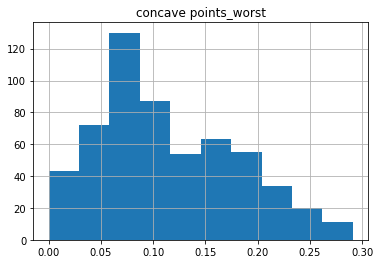

-------------------------------------------------------------------------------
symmetry_worst
count   569.000
mean      0.290
std       0.062
min       0.157
5%        0.213
10%       0.226
20%       0.244
30%       0.257
40%       0.269
50%       0.282
60%       0.296
70%       0.310
80%       0.325
90%       0.360
95%       0.406
99%       0.487
max       0.664
Name: symmetry_worst, dtype: float64


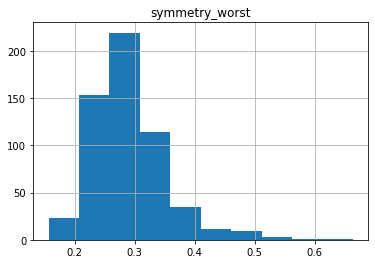

-------------------------------------------------------------------------------
fractal_dimension_worst
count   569.000
mean      0.084
std       0.018
min       0.055
5%        0.063
10%       0.066
20%       0.070
30%       0.073
40%       0.077
50%       0.080
60%       0.083
70%       0.089
80%       0.096
90%       0.106
95%       0.120
99%       0.141
max       0.207
Name: fractal_dimension_worst, dtype: float64


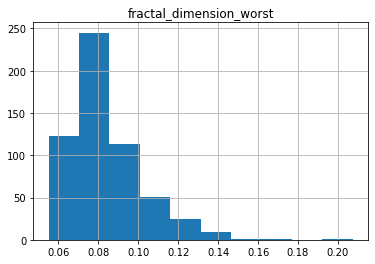

-------------------------------------------------------------------------------


In [14]:
summarize_Data_Plot(df,cat_cols,num_cols)

In [27]:
for col in num_cols: 
    print( df.groupby("diagnosis").agg({col: ["mean","median","sum","max","min"]}))

          Radius_mean                              
                 mean median      sum    max    min
diagnosis                                          
B              12.147 12.200 4336.309 17.850  6.981
M              17.463 17.325 3702.120 28.110 10.950
          Texture_mean                              
                  mean median      sum    max    min
diagnosis                                           
B               17.915 17.390 6395.570 33.810  9.710
M               21.624 21.485 4584.240 39.280 10.380
          perimeter_mean                                 
                    mean  median       sum     max    min
diagnosis                                                
B                 78.075  78.180 27872.920 114.600 43.790
M                115.365 114.200 24457.460 188.500 71.900
          area_mean                                    
               mean  median        sum      max     min
diagnosis                                              
B           462.7

<AxesSubplot:>

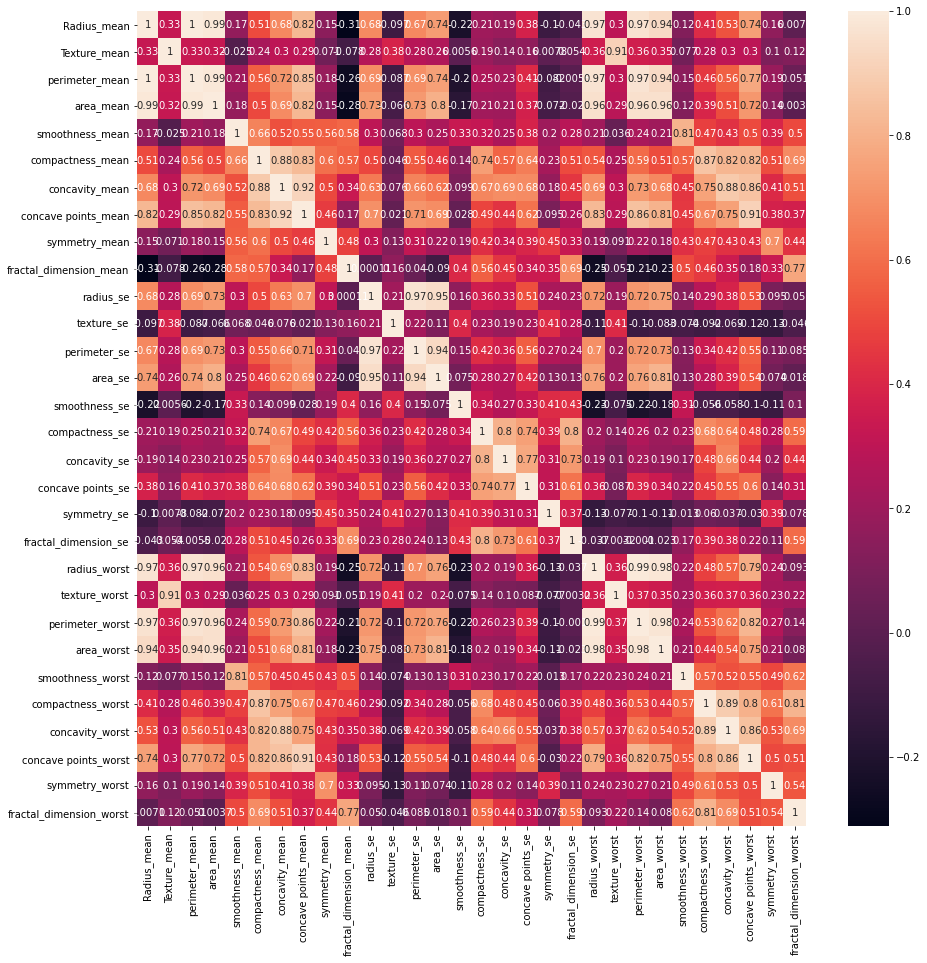

In [15]:
corr = df.corr()  
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr,annot=True)

## Deleted High Correlated Features

In [17]:
def Drop_High_Corr(df,corr_level=0.80) : 
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than cor level
    to_drop = [column for column in upper.columns if any(upper[column] > corr_level)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

In [18]:
Drop_High_Corr(df,corr_level=0.80)

In [19]:
len(df.columns)

14

## Feature Engineering

In [20]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

In [21]:
cat_col,num_col,car_col = grab_col_names(df)

In [22]:
len(num_col)

13

In [23]:
printColsTypes(num_col,cat_col,car_col)

['diagnosis'] 
 ['Radius_mean', 'Texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst'] 
 []


**Scaling**

In [24]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,diagnosis,Radius_mean,Texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,M,1.097,-2.075,1.568,3.284,2.218,2.256,2.490,-0.565,-0.214,1.317,0.661,1.149,2.751
1,M,1.830,0.575,-0.827,-0.487,0.001,-0.869,0.499,-0.876,-0.605,-0.693,0.260,-0.805,-0.244
2,M,1.580,0.454,0.942,1.053,0.940,-0.398,1.229,-0.780,-0.297,0.815,1.425,0.237,1.152
3,M,-0.769,0.252,3.284,3.403,2.867,4.911,0.326,-0.110,0.690,2.744,1.115,4.733,6.046
4,M,1.750,-1.153,0.280,0.539,-0.010,-0.562,1.271,-0.790,1.483,-0.049,1.144,-0.361,-0.868


**Outliers** 

In [25]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [26]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [27]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [28]:
for col in num_col: 
    print(check_outlier(df,col))

False
False
False
False
False
False
True
True
True
False
True
True
False


In [29]:
for col in num_col: 
    replace_with_thresholds(df,col,q1=0.10,q3=0.90)

In [30]:
for col in num_col: 
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
False
False


We have seen there is no nan in our dataset.Therefore I will not check nan values. 

**Encoding**

In [31]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [32]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [33]:
df = label_encoder(df,cat_col)

In [34]:
df.head()

,diagnosis,Radius_mean,Texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,1.097,-2.075,1.568,3.284,2.218,2.256,2.490,-0.565,-0.214,1.317,0.661,1.149,2.751
1,1,1.830,0.575,-0.827,-0.487,0.001,-0.869,0.499,-0.876,-0.605,-0.693,0.260,-0.805,-0.244
2,1,1.580,0.454,0.942,1.053,0.940,-0.398,1.229,-0.780,-0.297,0.815,1.425,0.237,1.152
3,1,-0.769,0.252,3.284,3.403,2.867,4.911,0.326,-0.110,0.690,2.744,1.115,4.733,6.046
4,1,1.750,-1.153,0.280,0.539,-0.010,-0.562,1.271,-0.790,1.483,-0.049,1.144,-0.361,-0.868


## Modelling 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [36]:
y = df["diagnosis"] 
x = df.drop("diagnosis",axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=17)

In [37]:
X_train.head()

,Radius_mean,Texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
38,0.245,1.373,-0.177,-1.005,-0.900,-1.100,2.919,1.762,-0.053,-0.813,1.196,-1.533,-2.161
458,-0.320,1.357,-0.902,-1.016,-0.528,-1.178,-0.516,0.027,-0.329,-0.922,-0.886,-1.016,-0.962
511,0.194,-1.069,-0.828,-1.027,-0.557,-1.321,-0.675,-1.077,-0.111,-0.755,-0.201,-0.574,-0.917
9,-0.474,1.104,1.583,2.563,0.797,2.783,-0.388,0.693,0.036,2.610,0.409,-0.321,2.370
339,2.665,1.157,0.750,0.454,-0.053,-1.097,2.179,-0.530,-0.250,-0.322,0.197,-0.696,-0.498


In [38]:
y_train.head()

38     1
458    0
511    0
9      1
339    1
Name: diagnosis, dtype: int32

In [39]:
from catboost import CatBoostClassifier

In [40]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.95
Recall: 0.95
Precision: 0.9
F1: 0.92
Auc: 0.95
